In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
housing_raw = pd.read_csv("D:/STUDIES/Data Visualization/Data/housing_data.csv", 
                          parse_dates=['period_begin', 'period_end'], 
                          dtype={'total_homes_sold':'Int32', 'region_name': 'category'})

In [13]:
ca_housing = housing_raw.loc[housing_raw['region_name'].str.contains("CA")]\
.assign(region_name = housing_raw['region_name'].str[0:-11]).set_index("period_begin").sort_index()

In [14]:
ca_housing.head()

,region_name,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
period_begin,,,,,,,,
2017-01-02,Mono,2017-03-26,97,153.0,161.0,89.7,450745.8,21.208631
2017-01-02,Yolo,2017-03-26,336,234.0,272.0,48.5,447859.2,9.857470
2017-01-02,Stanislaus,2017-03-26,1192,912.0,1043.0,55.3,300302.0,10.971331
2017-01-02,Shasta,2017-03-26,7,17.0,18.0,147.5,489020.8,17.333333
2017-01-02,Lassen,2017-03-26,2,5.0,5.0,98.8,198750.0,5.500000


In [15]:
sd_dual = (
    ca_housing.loc[ca_housing["region_name"] == "San Diego", ["inventory", "median_active_list_price"]]
)

sd_dual.head()

,inventory,median_active_list_price
period_begin,,
2017-01-02,5468.0,618570.8
2017-01-09,5493.0,621737.5
2017-01-16,5520.0,625820.8
2017-01-23,5546.0,629491.6
2017-01-30,5581.0,632824.0


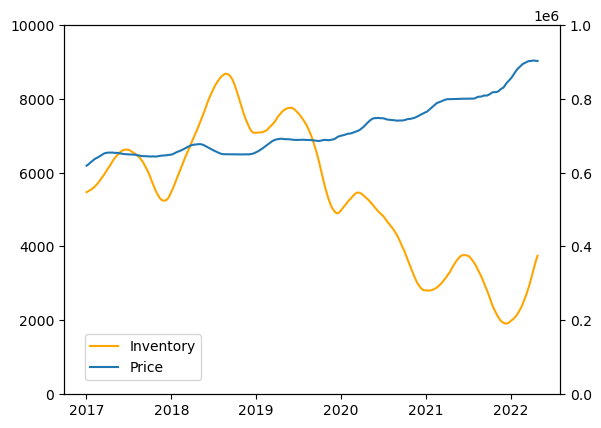

In [36]:
fig, ax = plt.subplots()

ax.plot(sd_dual["inventory"],
       label="Inventory",
       c = "orange")
ax.set_ylim(0,10000)

ax2 = ax.twinx()

ax2.plot(sd_dual["median_active_list_price"],
        label="Price")
ax2.set_ylim(0,1000000)

fig.legend(bbox_to_anchor=(.35,.25))